# Hertzsprung–Russell diagram

El diagrama H-R (diagrama color-magnitud) es una de las herramientas analíticas más importantes de la Astrofísica Moderna.  El diagrama permite representar en un plano cartesiano dos propiedades de una estrella, o bien su temperatura y luminosidad o su color y magnitud absoluta.  La mayoría de las estrellas en el Universo en este diagrama se agrupan en una franja diagonal conocida como la Secuencia Principal (ver figura abajo).  Hoy sabemos que esta franja corresponde a estrellas que fusionan Hidrógeno en su núcleo.  Afuera de esa franja se encuentran estrellas evolucionadas, que han dejado de fusionar Hidrógeno y que hoy fusionan otros núcleos o no fusionan nada en lo absoluto (ej. Enanas Blancas).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('data/hygdata_v3-1.csv')[['absmag', 'ci']]#lectura de datos para el diagrama

In [3]:
dfm=pd.read_csv('data/hygdata_v3-1.csv')[['absmag', 'ci','proper']]#lectura de datos incluido proper donde 
#se almacena el nombre de las estrellas

# Definiendo dataframe para las estrellas que se quiere resaltar con  marcadores

In [4]:
dfm = dfm.set_index(['proper'])#tomando la columna proper como indice para definir los dataframe de cada estrella a marcar

In [5]:
sol=(dfm.loc['Sol'])#definicion de los dataframe para las estrellas que se ven a marcar
betelgeuse=(dfm.loc['Betelgeuse'])
puppis=(dfm.loc['Naos'])
PróximaC=(dfm.loc['Proxima Centauri'])
Sirius=(dfm.loc['Sirius'])
Polaris=(dfm.loc['Polaris'])

# Creación del Hertzsprung–Russell diagram a blanco y negro

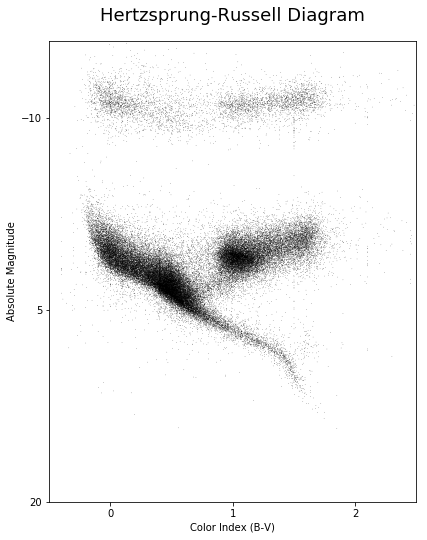

In [6]:
fig = plt.figure(figsize=(6, 8),dpi=72)#defiicion del macro de imagen donde se van a montar los datos
ax = fig.add_axes([.1, .1, .85, .8])
ax.set_title('Hertzsprung-Russell Diagram', fontsize=18)
ax.title.set_position([.5, 1.03])
ax.set_xlabel('Color Index (B-V)')
ax.set_ylabel('Absolute Magnitude')

ax.scatter(df['ci'],df['absmag'],marker='.',s=[1] * len(df),facecolors='black',linewidth=0)
ax.set_xlim(-.5, 2.5)
ax.set_xticks(np.linspace(0, 2, 3, endpoint=True))
ax.set_ylim(18, -16)
ax.set_yticks(np.linspace(20, -10, 3, endpoint=True))

## Definición de la función que cambia el formato de color RGB a B-V

In [7]:
def bv2rgb(bv):
    t = (5000 / (bv + 1.84783)) + (5000 / (bv + .673913))
    x, y = 0, 0
    
    if 1667 <= t <= 4000:
        x = .17991 - (2.66124e8 / t**3) - (234358 / t**2) + (877.696 / t)
    elif 4000 < t:
        x = .24039 - (3.02585e9 / t**3) + (2.10704e6 / t**2) + (222.635 / t)
        
    if 1667 <= t <= 2222:
        y = (-1.1063814 * x**3) - (1.34811020 * x**2) + 2.18555832 * x - .20219683
    elif 2222 < t <= 4000:
        y = (-.9549476 * x**3) - (1.37418593 * x**2) + 2.09137015 * x - .16748867
    elif 4000 < t:
        y = (3.0817580 * x**3) - (5.87338670 * x**2) + 3.75112997 * x - .37001483
        
    X = 0 if y == 0 else x / y
    Z = 0 if y == 0 else (1 - x - y) / y
    
    r, g, b = np.dot([X, 1., Z],
        [[3.2406, -.9689, .0557], [-1.5372, 1.8758, -.204], [-.4986, .0415, 1.057]])
    
    R = np.clip(12.92 * r if (r <= 0.0031308) else 1.4 * (r**2 - .285714), 0, 1)
    G = np.clip(12.92 * g if (g <= 0.0031308) else 1.4 * (g**2 - .285714), 0, 1)
    B = np.clip(12.92 * b if (b <= 0.0031308) else 1.4 * (b**2 - .285714), 0, 1)
    
    return [R, G, B, np.random.ranf()]

color = df['ci'].apply(bv2rgb)

## Creación del Hertzsprung–Russell diagram a color

/home/cesar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  import sys


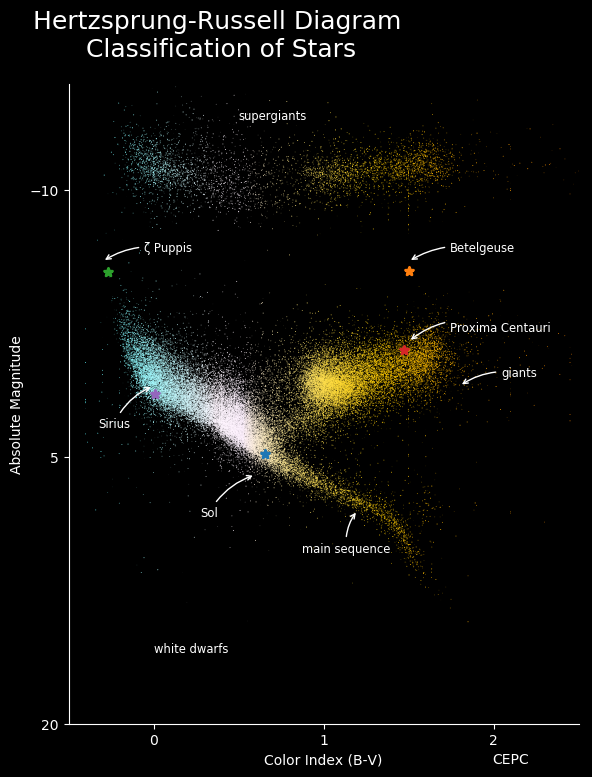

In [8]:
fig = plt.figure(
    figsize=(6, 8),
    facecolor='black',
    dpi=100)
ax = fig.add_axes([.1, .1, .85, .8])

ax.set_axis_bgcolor('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_title('Hertzsprung-Russell Diagram \nClassification of Stars', color='white', fontsize=18)
plt.text(2.1,22 , 'CEPC',color='white', fontsize = 10, horizontalalignment='center', verticalalignment='center') 

ax.title.set_position([0.3, 1.03])
ax.set_xlabel('Color Index (B-V)', color='white')
ax.set_ylabel('Absolute Magnitude', color='white')

ax.scatter(df['ci'],df['absmag'],marker='.',s=[2] * len(df),facecolors=color,linewidth=0)

ax.set_xlim(-.5, 2.5)
ax.set_xticks(np.linspace(0, 2, 3, endpoint=True))
ax.set_ylim(18, -16)
ax.set_yticks(np.linspace(20, -10, 3, endpoint=True))
ax.tick_params(top='off', right='off', direction='out', colors='white')
#a partir de esta linea se escriben las etiquetas de los sectores del diagrama y los marcadores para algunas estrellas
ax.annotate(
    'main sequence', xy=(1.2, 8), xycoords='data',
    fontsize='small', color='white',
    xytext=(-40, -30), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        connectionstyle="arc3,rad=-.2",
        color='white'))
ax.annotate(
    'Sol', xy=(0.6, 6), xycoords='data',
    fontsize='small', color='white',
    xytext=(-40, -30), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        connectionstyle="arc3,rad=-.2",
        color='white'))
ax.annotate(
    'Sirius', xy=(0, 1), xycoords='data',
    fontsize='small', color='white',
    xytext=(-40, -30), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        connectionstyle="arc3,rad=-.2",
        color='white'))
ax.annotate(
    'Betelgeuse', xy=(1.5, -6), xycoords='data',
    fontsize='small', color='white',
    xytext=(30, 7), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        connectionstyle="arc3,rad=.2",
        color='white'))
ax.annotate(
    'ζ Puppis', xy=(-0.3, -6), xycoords='data',
    fontsize='small', color='white',
    xytext=(30, 7), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        connectionstyle="arc3,rad=.2",
        color='white'))
ax.annotate(
    'Proxima Centauri', xy=(1.5, -1.5), xycoords='data',
    fontsize='small', color='white',
    xytext=(30, 7), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        connectionstyle="arc3,rad=.3",
        color='white'))
ax.annotate(
    'giants', xy=(1.8, 1), xycoords='data',
    fontsize='small', color='white',
    xytext=(30, 7), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        connectionstyle="arc3,rad=.2",
        color='white'))
ax.annotate(
    'supergiants', xy=(.5, -14), xycoords='data',
    fontsize='small', color='white')
ax.annotate(
    'white dwarfs', xy=(0, 16), xycoords='data',
    fontsize='small', color='white');
ax.scatter(sol['ci'],sol['absmag'], marker='*', linewidth=2)
ax.scatter(betelgeuse['ci'],betelgeuse['absmag'], marker='*', linewidth=2)
ax.scatter(puppis['ci'],puppis['absmag'], marker='*', linewidth=2)
ax.scatter(PróximaC['ci'],PróximaC['absmag'], marker='*', linewidth=2)
ax.scatter(Sirius['ci'],Sirius['absmag'], marker='*', linewidth=2)


